(3750,) (3750,)
-0.03779466168006854
0.9920801322508517


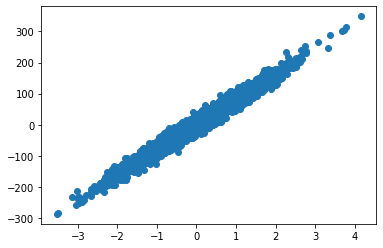

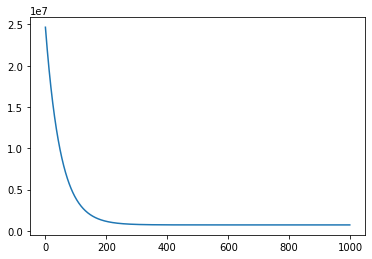

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dx = pd.read_csv(r'C:\Users\dell\Downloads\Linear_X_Train.csv')
dy =pd.read_csv(r'C:\Users\dell\Downloads\Linear_Y_Train.csv')
dx =dx.values
dy =dy.values


dx = dx.reshape((-1,))
dy = dy.reshape((-1,))
print(dx.shape,dy.shape)
print(dx.mean())
print(dx.std())
X = (dx-dx.mean())/dx.std()
Y = dy

plt.scatter(X,Y)
plt.show()


def hypothesis(x,theta):
    return theta[0]+theta[1]*x


def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

def gradient(x,theta,y):
    m = x.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx - y[i])
        grad[1] += (hx - y[i])*x[i]
        
    return grad/m

def gradient_descent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((2,))
    
    err_list = []
    theta_list = []
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= (learning_rate*(grad[0]))
        theta[1] -= (learning_rate*grad[1])
    
    return theta,err_list,theta_list

final_theta , err_list , theta_list = gradient_descent(X,Y)
plt.plot(err_list)

[ 0.68383944 79.90228731]
(1250, 1)


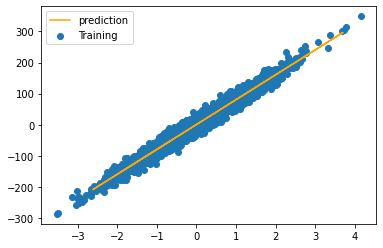

In [3]:
print(final_theta)

test =pd.read_csv(r'C:\Users\dell\Downloads\Linear_X_Test.csv')
test = test.values
test =test.reshape((-1,1))
print(test.shape)

plt.scatter(X,Y,label = 'Training')
plt.plot(test ,hypothesis(test,final_theta),color = 'orange',label = 'prediction' )
plt.legend()
plt.show()

(3750, 1) (3750, 1)
(1250, 1)
Bias of the given model :  [3.72798828]
Co - Efficient of the given model :  [[80.54363185]]
Score of the given model :  

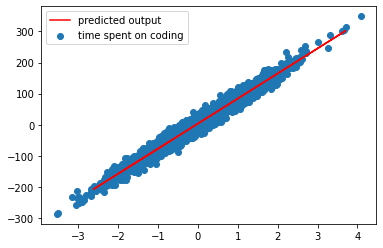

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = LinearRegression()

dx = pd.read_csv(r'C:\Users\dell\Downloads\Linear_X_Train.csv')
dy =pd.read_csv(r'C:\Users\dell\Downloads\Linear_Y_Train.csv')
dx =dx.values
dy =dy.values


dx = dx.reshape((-1,1))
dy = dy.reshape((-1,1))
print(dx.shape,dy.shape)
model.fit(dx,dy)

test =pd.read_csv(r'C:\Users\dell\Downloads\Linear_X_Test.csv')
test = test.values
test =test.reshape((-1,1))
print(test.shape)

output = model.predict(test)

bias = model.intercept_
coeff = model.coef_

print('Bias of the given model : ',end =" ")
print(bias)
print('Co - Efficient of the given model : ',end =" ")
print(coeff)

print('Score of the given model : ',end =" ")
#output = model.score(dx,dy)

plt.scatter(dx,dy,label='time spent on coding')
plt.plot(test,output,color='red',label='predicted output')
plt.legend()
plt.show()